# Exercise: Inference of admixture and population structure

## A. Use of NGSadmix to infer admixture proportions for numerous individuals

In this exercise we will try to use NGSadmix to analyze a NGS dataset.

###  Login to the server and set paths


In [1]:
# Set path to ANGSD program
ANGSD=/home/ida/teaching/popgen19/admixexercise/programs/angsd

# Set path to NGSadmix
NGSadmix=/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix

# Set path to a bam file list with several bam files
BAMFOLDER=/ricco/data/genis/popgen22/admixexercise/smallbams

## First small example

We will first try to run an NGSadmix analysis of a small dataset consisting of bam files with low depth NGS data from 435 samples of 5 human populations from the 1000 genomes project:


| Population code | Population                                     | Sample size |
|-----------------|------------------------------------------------|-------------|
| ASW             | HapMap African ancestry individuals from SW US | 61          |
| CEU             | European individuals                           | 99          |
| CHB             | Han Chinese in Beijing                         | 103         |
| YRI             | Yoruba individuals from Nigeria                | 108         |
| MXL             | Mexican individuals from LA California         | 63          |


### Make input data using ANGSD

The input to NGSadmix is genotype likelihoods (GLs). Therefore the first step of running an NGSadmix analysis (if all you have are bams files) is to calculate GLs. So let's start bying doing that. First make a file that contains the paths of all the 30 bam files:

In [2]:
find $BAMFOLDER |  grep bam$ > all.files

To see the content of the file you made type:

In [3]:
cat all.files

/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA20281.mapped.ILLUMINA.bwa.ASW.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19200.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA18538.mapped.ILLUMINA.bwa.CHB.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19649.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA18874.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19741.mapped.ILLUMINA.bwa.MXL.low_coverage.20130415.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19917.mapped.ILLUMINA.bwa.ASW.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19901.mapped.ILLUMINA.bwa.ASW.low_coverage.20120522.bam
/ricco/data/genis/popgen22/admixexercise/smallbams/small.NA19658.mapped.ILLUMINA

Now calculate GLs from all the BAM files using ANGSD by running the following command in the terminal:

In [4]:
$ANGSD -bam all.files -GL 2 -doMajorMinor 1 -doMaf 1 -SNP_pval 2e-6 -minMapQ 30 -minQ 20 -minInd 25 -minMaf 0.05 -doGlf 2 -out all -P 5

	-> Problem with difference in zlib version used for compiling and linking
	-> ZLIB_VERSION: 1.2.8 zlibversion: 1.2.11 
	-> angsd version: 0.913-52-gae40176 (htslib: 1.3.2-129-gdaae2ea) build(Oct  9 2016 13:51:08)
	-> SNP-filter using a pvalue: 2.000000e-06 correspond to 22.595043 likelihood units
	-> Parsing 435 number of samples 

	-> Allocated ~ 10 Megabytes to the nodepool

	-> Allocated ~ 20 Megabytes to the nodepool

	-> Allocated ~ 30 Megabytes to the nodepool

	-> Allocated ~ 40 Megabytes to the nodepool

	-> Allocated ~ 50 Megabytes to the nodepool

	-> Allocated ~ 60 Megabytes to the nodepool

	-> Allocated ~ 70 Megabytes to the nodepool

	-> Allocated ~ 80 Megabytes to the nodepool

	-> Allocated ~ 90 Megabytes to the nodepool

	-> Allocated ~ 100 Megabytes to the nodepool

	-> Allocated ~ 110 Megabytes to the nodepool
	-> Printing at chr: 14 pos:20692360 chunknumber 200 contains 699 sites
	-> Allocated ~ 120 Megabytes to the nodepool

	-> Done reading data waiting for calcu

NOTE that this will take a bit of time to run (around a minute). While waiting, try to remember what the different options used mean (you have seen most of them in previous exercises). If you do not remember all of them, then try to ask the person next to you. And if neither of you remember then try to figure it out by looking for help on the ANGSD webpage e.g. [here](http://www.popgen.dk/angsd/index.php/Genotype_Likelihoods), [here](http://www.popgen.dk/angsd/index.php/Major_Minor) and [here](http://www.popgen.dk/angsd/index.php/Filters).

If ANGSD hasn't finished running yet and you are tired of waiting for it to do so, then stop it (by typing Ctrl-C) and copy the resulting files (pre-made by us) by typing:

In [5]:
cp /ricco/data/genis/popgen22/admixexercise/smalladmix/input/all.* .

## Explore the input data

Now let's have a look at the GL file that you have created with ANGSD. It is a "beagle format" file called all.beagle.gz - and will be the input file to NGSadmix. The first line in this file is a header line and after that it contains a line for each locus with GLs. By using the unix command wc we can count the number of lines in the file:

In [6]:
gunzip -c all.beagle.gz | wc -l

1307



- Use this to find out how many loci there are GLs for in the data set?

Next, to get an idea of what the GL file contains try from the command line to print the first 9 columns of the first 7 lines of the file:

In [8]:
gunzip -c all.beagle.gz | head -n 7 | cut -f1-9 | column -t


gzip: stdout: Broken pipe
marker      allele1  allele2  Ind0      Ind0      Ind0      Ind1      Ind1      Ind1
1_20018051  2        1        0.333333  0.333333  0.333333  0.000028  0.333333  0.666639
1_20018077  1        3        0.333333  0.333333  0.333333  0.941144  0.058856  0.000000
1_20018091  3        1        0.333333  0.333333  0.333333  0.000000  0.058845  0.941155
1_20018096  2        0        0.333333  0.333333  0.333333  0.888876  0.111124  0.000000
1_20018195  2        0        0.799972  0.200028  0.000000  0.000000  0.111137  0.888863
1_20050859  3        1        0.000140  0.333333  0.666526  0.799987  0.200013  0.000000



In general, the first three columns of a beagle file contain marker name and the two alleles, allele1 and allele2, present in the locus (in beagle A=0, C=1, G=2, T=3). All following columns contain genotype likelihoods (three columns for each individual: first GL for homozygote for allele1, then GL for heterozygote and then GL for homozygote for allele2). Note that the GL values sum to one per site for each individuals. This is just a normalization of the genotype likelihoods in order to avoid underflow problems in the beagle software it does not mean that they are genotype probabilities.

- Based on this, what is the most likely for ind0 in the first locus? And for ind1 in the second locus?

## Run an analysis of the data with NGSadmix

Now you know how the input looks. Next, let's try to perform an NGSadmix analyses of the GLs typing assuming the number of ancestral populations, K, is 3:

In [14]:
$NGSadmix -likes all.beagle.gz -K 3 -minMaf 0.05 -seed 1 -o all

	-> Dumping file: all.log
	-> Dumping file: all.filter
Input: lname=all.beagle.gz nPop=3, fname=(null) qname=(null) outfiles=all
Setup: seed=1 nThreads=1 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=1306 nind=435
Input file has dim (AFTER filtering): nsites=1306 nind=435
iter[start] like is=724956.880245
iter[50] like is=-454872.633474 thres=0.015016
iter[100] like is=-454481.006773 thres=0.001095
iter[150] like is=-454475.170669 thres=0.000155
EM accelerated has reached convergence with tol 0.000010
best like=-454474.828385 after 188 iterations
	-> Dumping file: all.qopt
	-> Dumping file: all.fopt.gz
	[ALL done] cpu-time used =  9.34 sec
	[ALL done] walltime used =  9.00 sec



- While waiting for the analysis to run then make sure you understand the command. If you are in doubt seek help [here](http://www.popgen.dk/software/index.php/NgsAdmix#Parameters). Here you can also see what other options you have when you run an NGSadmix analyses.


## Explore the output

The output from the analysis you just ran is three files:

- all.log (a "log file" that summarizes the analysis run)
- all.fopt.gz (an "fopt file", which has a line for each locus that contains an estimate of the allele frequency in each of the 3 assumed ancestral populations)
- all.qopt (a "qopt file", which has a line for each individual that contains anestimate of the individual's ancestry proportion from each of the three assumed ancestral populations).

Let's have a look at them one at a time. First, check the log file by typing

In [10]:
cat all.log

Input: lname=all.beagle.gz nPop=3, fname=(null) qname=(null) outfiles=all
Setup: seed=1 nThreads=1 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=1306 nind=435
Input file has dim (AFTER filtering): nsites=1306 nind=435
	[ALL done] cpu-time used =  9.99 sec
	[ALL done] walltime used =  10.00 sec
best like=-454474.828385 after 188 iterations



- What is the log likelihood of the estimates achieved by NGSadmix (called "best like" in the log file)?

Next, check the first line of the fopt file by typing:

In [15]:
zcat all.fopt.gz | head -n1

0.74462749128613758831 0.29917014202032143899 0.38076568446468489482 

gzip: stdout: Broken pipe



- Based on this: what is the estimated allele frequency at the first locus in the three assumed ancestral populations?

Finally, check the first line of the qopt file and thus the estimated admixture proportions for the first individuals by typing:

In [16]:
head -n1 all.qopt

0.08016251065576759927 0.05227806237612714346 0.86755942696810528503 



- Based on this: does the individual look admixed?

You can see the ID of the first individual by getting the first line of the file you created with all your original bam files in the beginning:

In [17]:
head -n1 all.files | xargs basename

small.NA20281.mapped.ILLUMINA.bwa.ASW.low_coverage.20120522.bam



- Based on that ID, which population does the individual come from?
- What does this suggest about what column to look for the frequencies for that population in the pop file?
- Based on this and the frequency estimates for the first locus that you looked at earlier, what does NGSadmix estimate the allele frequency to be at the first locus in that population?

## Plot the admixture proportion estimates

Finally, try to make a simple plot the estimated admixture proportions for all the individuals by opening the statistical program called R (which you do by typing "R" in the terminal and pressing enter) and then copy pasting the following code:

Read 435 items


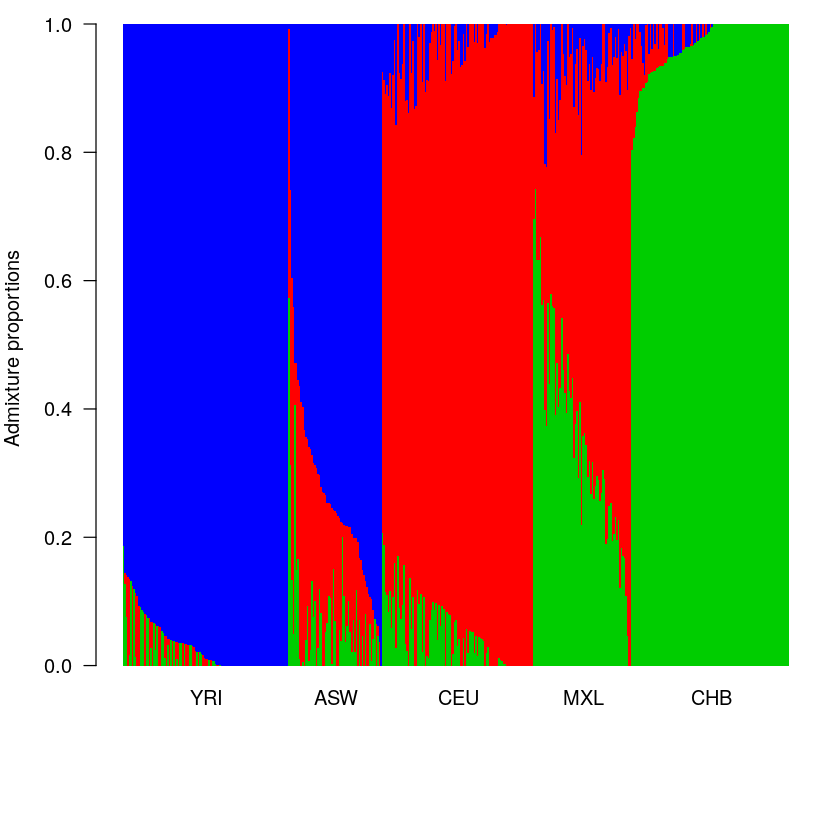

In [18]:
# Get ID and pop info for each individual
s<-strsplit(basename(scan("all.files",what="theFuck")),"\\.")
pop<-sapply(s,function(x) x[6])

# import some funcitons to help in visualization
source("/home/genis/software/evalAdmix/visFuns.R")

# Read inferred admixture proportions
q<-read.table("all.qopt")

# order individuals by population, and within populaiton by admixture proporiton
ord <- orderInds(pop=pop,q=q, popord=c("YRI", "ASW", "CEU", "MXL", "CHB"))
            
par(mar=c(7,4,1,1))
barplot(t(q)[,ord],col=c(3,2,4),las=2,ylab="Admixture proportions", space=0, border=NA)
text(sort(tapply(1:length(pop),pop[ord],mean)),-0.05,unique(pop[ord]),xpd=NA)

Note that the order of the individuals in the plot are not the same as in the qopt file. Instead, to provide a better overview, the individuals have been ordered according to the population they are sampled from.

- Try to explain what the plot shows (what is on the axes, what do the colors mean and so on)
- What does the plot suggest about whether the individuals are admixed?

NB As you could tell from the number of loci included in the analysis, the above analysis is based on data from very few loci (actually we on purpose only analyzed data from a small part of the genome to make sure the analysis ran fast). In the following we will redo the analyses using a larger number of sites.


## More realistic example

Now you know how to make input data to NGSadmix, how to run NGSadmix and what the output looks like. We will try now to run a more realistic dataset, using the same samples with a larger number of sites. We have already made the input file with genotype likelihoods for 100 000 sites across the genome, and a file with populaiton info.


- A file with genotype likelihoods from the 100 individuals in beagle format: /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops100ksites.beagle.gz
- A file with labels that indicate which population they are sampled from: /home/genis/admix_evaluation/ngs/data/1000g_5pops/info/1000G5popSameIndsAsGenos.info


## Run an analysis of the data with NGSadmix

We start by running an NGSadmix analyses with K=3 (-K 3), using 10 cpu threads (-P 10) and using only SNPs with minor allele frequency above 0.05 (-minMaf 0.05). Furthermore, to make sure we reach the maximum likelihood solution and not a local optima, we should run 20 independent optimizations runs (-seed i for i in 1:20).

(Because running this would be too computationally intense to run everyone at the same time in the server, we have already ran it and the following code just prints the commands you would need to run.)  

In [19]:
inputpath=/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz
outpath=/ricco/data/genis/popgen22/admixexercise/admixoutput
K=3

for i in `seq 1 20`
do
    echo "$NGSadmix -likes $inputpath -K $K -P 10 -minMaf 0.05 -seed $i -o ${outpath}/1000G5popsAdmixK${K}seed${i}"
done


/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 1 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed1
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 2 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed2
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 3 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed3
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 4 -o /ricco/data/genis/popgen22/admixexercise

This will produce 20 NGSadmix results with their corresponding output files. In order to assess convergence and find the run with the best log likelihood, we need to check the log likelihoods of the data. This command with extract the log likelihood of each run from the log file, add the seed and sort them from the best to the worse log likelihood.

In [20]:
outadmix=/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmix
K=3

rm allK$K.likes
for i in `seq 1 20`
do 
    cat ${outadmix}K${K}seed$i.log | grep "best like" | awk -F"[ =]" '{print $3}' >> allK$K.likes
done

cat -n allK$K.likes | sort -rhk2

     3	-34941707.471918
    16	-34941707.578680
     7	-34941707.737304
    18	-34941707.948875
     2	-34941707.989102
     5	-34941708.085802
    14	-34941708.105071
    10	-34941708.189336
    17	-34941708.223968
    11	-34941708.264658
     1	-34941708.271672
    19	-34941708.277761
    13	-34941708.301470
     6	-34941708.325179
    12	-34941708.327209
     8	-34941708.330550
    20	-34941708.390396
     4	-34941708.432519
     9	-34941708.447228
    15	-34941708.730805



- Does it look like most runs reliably converge to the same global optimum?

We continue by visualizing the results of the maximum likelihood run (all runs reached the same optimum, so we would see the same results regardless of which one we plotted).

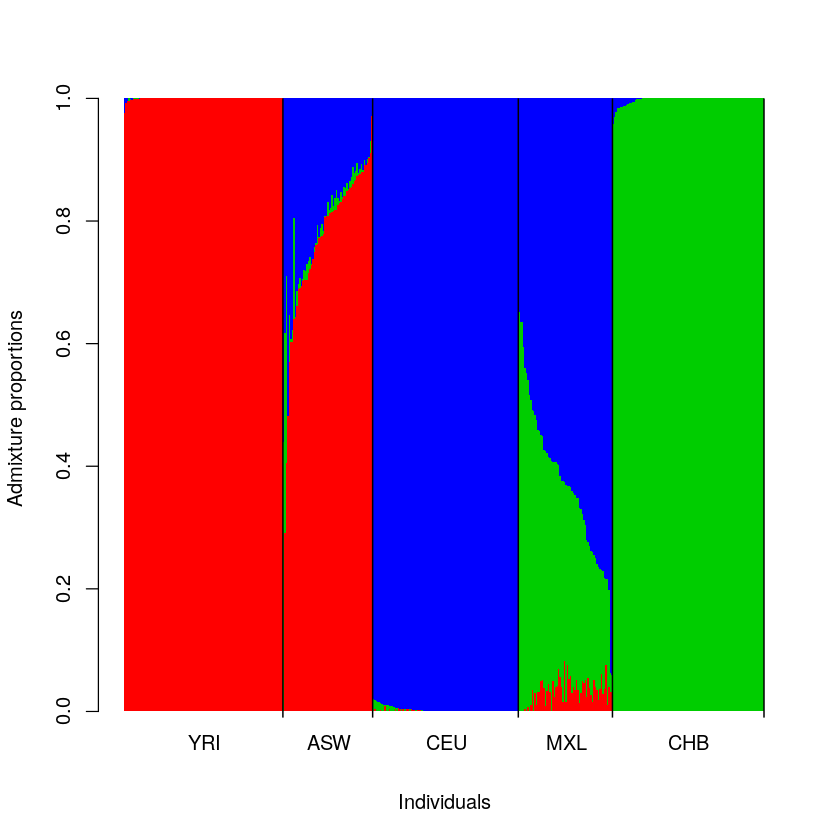

In [21]:
source("/home/genis/software/evalAdmix/visFuns.R") # import some funcitons to help in visualization
pop<-read.table("/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.pop.info",as.is=T)
q<-read.table("/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed3.qopt")


ord<-orderInds(pop = pop[,1], q=q) # sort indiivduals by population and within populaoitn by admixture proportion

barplot(t(q)[,ord],col=2:10,space=0,border=NA,xlab="Individuals",ylab="Admixture proportions")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)),-0.05,unique(pop[ord,1]),xpd=T) # add population labels
abline(v=cumsum(sapply(unique(pop[ord,1]),function(x){sum(pop[ord,1]==x)})),col=1,lwd=1.2)

- Why do you think it looks cleaner than the previous admixture plot we visualized with the same individuals?
- How many populations would you say now are admixed? Which population seem to be the admixture source? Does that make sense given what you know of these populations?

## Assessing model fit

We will now use evalAdmix to assess if the ancestries inferred in our admixture results are a good approximation to the correct ancestries.

Again, due to time and computational limitations, we have already ran the command and just provide here the command used:

In [22]:
EVALADMIX=/home/genis/software/evalAdmix/evalAdmix

K=3
besti=3
inbgl=/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz
inadmix=/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK${K}seed${besti}
out=/ricco/data/genis/popgen22/admixexercise/evaladmixoutput/1000G5pops.K${K}seed${besti}.corres

echo "$EVALADMIX -beagle $inbgl -fname ${inadmix}.fopt.gz -qname ${inadmix}.qopt -o $out -P 20"

/home/genis/software/evalAdmix/evalAdmix -beagle /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -fname /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed3.fopt.gz -qname /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed3.qopt -o /ricco/data/genis/popgen22/admixexercise/evaladmixoutput/1000G5pops.K3seed3.corres -P 20



We will now visualize the correlation of residuals estimated by evalAdmix, and use it to assess whether the estimated admixture proportions results are a good fit to the data.

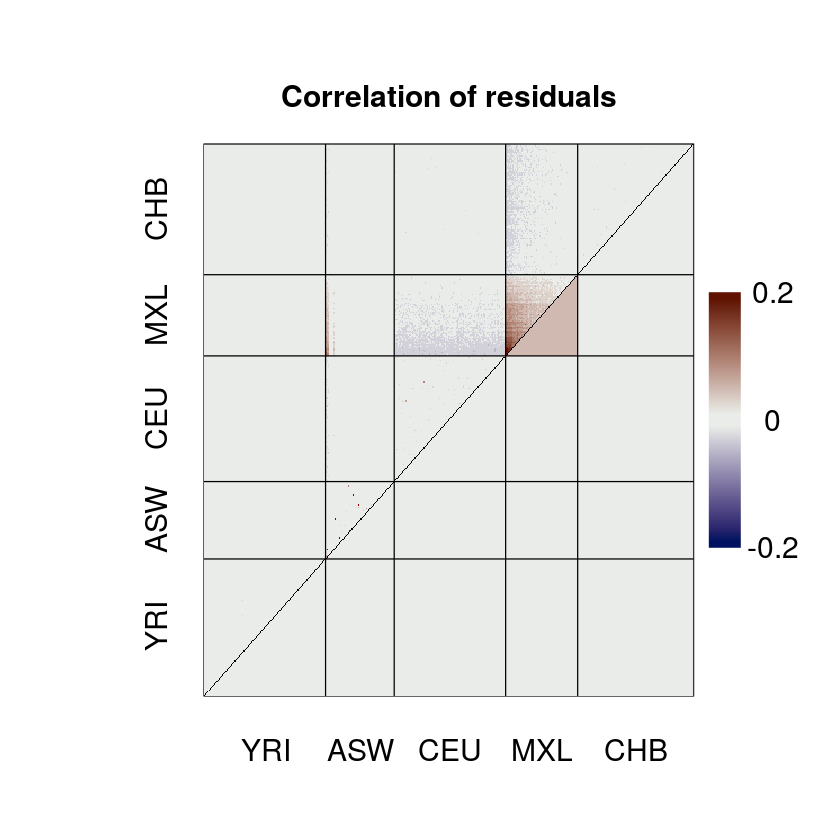

In [27]:
source("/home/genis/software/evalAdmix/visFuns.R") # import some funcitons to help in visualization

pop<-read.table("/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.pop.info",as.is=T)
q<-read.table("/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK3seed3.qopt")
r <- as.matrix(read.table("/ricco/data/genis/popgen22/admixexercise/evaladmixoutput/1000G5pops.K3seed3.corres"))

ord<-orderInds(pop = pop[,1], q=q) # sort indiivduals by population and within populaoitn by admixture proportion

plotCorRes(r, pop=pop[,1], ord=ord, max_z = 0.2)

- Is there any population for which the estimated admixture proportions do not seem to have a good fit?
- Looking at the admixture proportions plot, can you think of a reason why that population might not be correctly modelled?

## Trying other values of K

We will now do again the analyses but using 4 instead of 3 ancestral populations. We start by doing 20 independent runs of NGSadmix, with the same setting except that this time we use K = 4. We then collect the likelihoods form the log files and look at them to assess if the optimization has converged to the global maximum likelihood.

(Again, the analyses has already been run and we just provide the code to print the commands).

In [28]:
inputpath=/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz
outpath=/ricco/data/genis/popgen22/admixexercise/admixoutput
K=4

for i in `seq 1 20`
do
    echo "$NGSadmix -likes $inputpath -K $K -P 10 -minMaf 0.05 -seed $i -o ${outpath}/1000G5popsAdmixK${K}seed${i}"
done

outadmix=/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmix
rm allK${K}.likes
for i in `seq 1 20`
do 
    cat ${outadmix}K${K}seed$i.log | grep "best like" | awk -F"[ =]" '{print $3}' >> allK${K}.likes
done

cat -n allK${K}.likes | sort -rhk2

/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 1 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK4seed1
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 2 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK4seed2
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 3 -o /ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK4seed3
/home/ida/teaching/popgen19/admixexercise/programs/NGSadmix -likes /ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 4 -o /ricco/data/genis/popgen22/admixexercise

- Does it look like it has converged?
- Can you guess why there seems to be slightly more variability in the log likelihood of different runs than when using K=3?

We will now run evalAdmix to assess the model fit of the best admixture run (again, it has been pre ran and we just print the command):

In [ ]:
EVALADMIX=/home/genis/software/evalAdmix/evalAdmix

K=4
besti=9
inbgl=/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.inputgl.beagle.gz
inadmix=/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK${K}seed${besti}
out=/ricco/data/genis/popgen22/admixexercise/evaladmixoutput/1000G5pops.K${K}seed${besti}.corres

echo "$EVALADMIX -beagle $inbgl -fname ${inadmix}.fopt.gz -qname ${inadmix}.qopt -o $out -P 20"

We will now visualize the estimated admixture proporitons and the correlation of residuals to assess their fit:

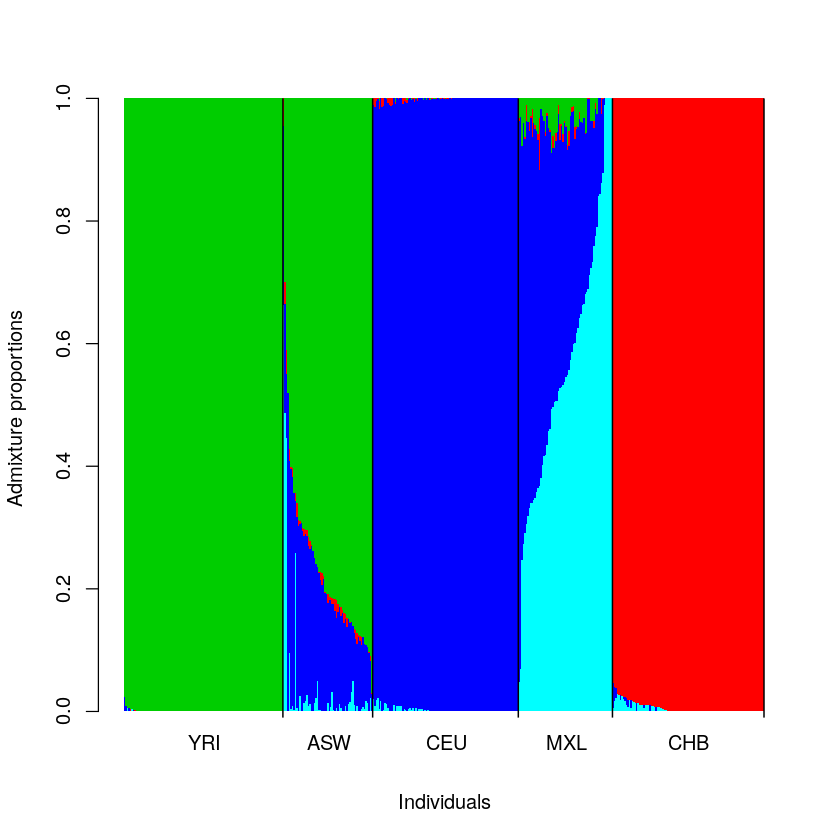

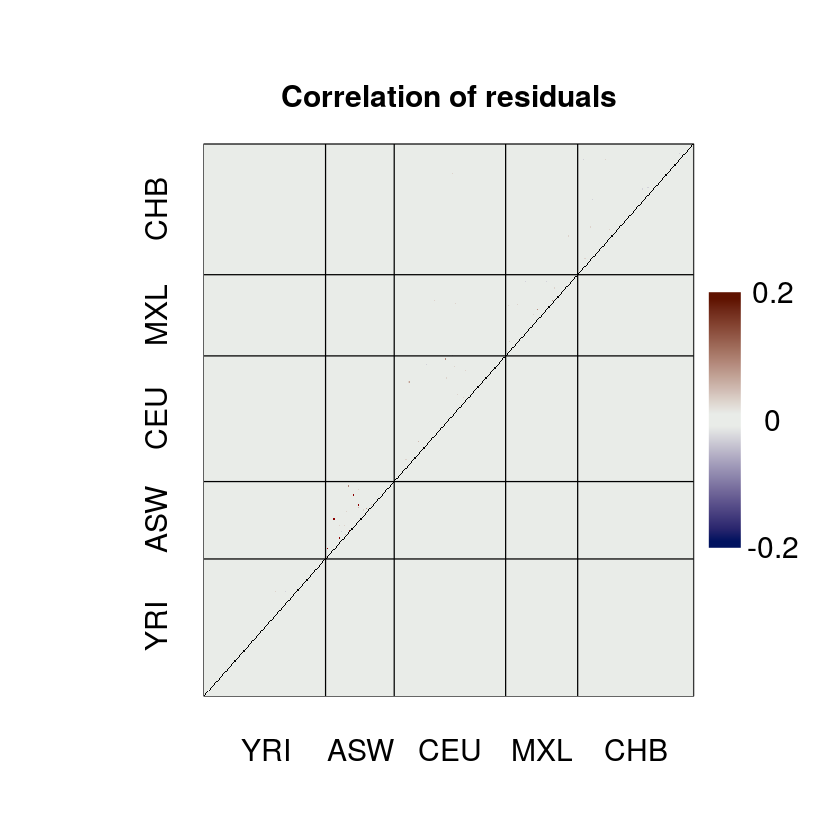

In [30]:
source("/home/genis/software/evalAdmix/visFuns.R") # import some funcitons to help in visualization
pop<-read.table("/ricco/data/genis/popgen22/admixexercise/admixinput/1000G5pops.pop.info",as.is=T)
q<-read.table("/ricco/data/genis/popgen22/admixexercise/admixoutput/1000G5popsAdmixK4seed9.qopt")


ord<-orderInds(pop = pop[,1], q=q) # sort indiivduals by population and within populaoitn by admixture proportion

# plot admixture proportions
barplot(t(q)[,ord],col=c(5,4,2,3),space=0,border=NA,xlab="Individuals",ylab="Admixture proportions")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)),-0.05,unique(pop[ord,1]),xpd=T) # add population labels
abline(v=cumsum(sapply(unique(pop[ord,1]),function(x){sum(pop[ord,1]==x)})),col=1,lwd=1.2)

r <- as.matrix(read.table("/ricco/data/genis/popgen22/admixexercise/evaladmixoutput/1000G5pops.K4seed9.corres"))
plotCorRes(r, pop=pop[,1], ord=ord, max_z = 0.2)

- To what population corresponds the new cluster that we have added?
- Based on the correlation of residuals, would you say adding that cluster has given a significant improvement to the model fit?